In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

In [77]:
dataframe=pd.read_excel("/content/drive/MyDrive/Freelance/Sri/task-3/Unit6-Portfolio-Task-Data.xlsx")
dataframe.head()

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
0,0,739,13,12,M,Single,23,Own,Unskilled,Low
1,0,1230,25,0,M,Divorced,32,Own,Skilled,High
2,0,389,19,119,M,Single,38,Own,Management,High
3,638,347,13,14,M,Single,36,Own,Unskilled,High
4,963,4754,40,45,M,Single,31,Rent,Skilled,Low


In [78]:
data = dataframe.copy()

In [79]:
data.shape

(425, 10)

In [80]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Current Account,Savings Account,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk
172,0,192,7,2,M,Single,39,Own,Unskilled,Low
78,0,626,43,0,M,Single,64,Own,Unemployed,Low
122,0,12242,25,53,M,Single,34,Own,Skilled,High
376,0,914,19,0,F,Divorced,21,Rent,Skilled,High
146,0,1851,12,0,F,Divorced,56,Own,Unskilled,Low
343,257,460,49,75,F,Divorced,58,Rent,Skilled,High
298,0,859,19,23,M,Single,35,Own,Skilled,High
4,963,4754,40,45,M,Single,31,Rent,Skilled,Low
274,852,3613,61,83,F,Divorced,59,Other,Management,High
119,828,391,9,12,F,Divorced,23,Own,Skilled,High


In [81]:
data.describe()

,Current Account,Savings Account,Months Customer,Months Employed,Age
count,425.000000,425.000000,425.000000,425.000000,425.000000
mean,1048.014118,1812.562353,22.896471,31.896471,34.397647
std,3147.183472,3597.285020,12.267599,32.259321,11.045126
min,0.000000,0.000000,5.000000,0.000000,18.000000
25%,0.000000,228.000000,13.000000,6.000000,26.000000
50%,0.000000,596.000000,19.000000,20.000000,32.000000
75%,560.000000,921.000000,28.000000,47.000000,41.000000
max,19812.000000,19811.000000,73.000000,119.000000,73.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Current Account  425 non-null    int64 
 1   Savings Account  425 non-null    int64 
 2   Months Customer  425 non-null    int64 
 3   Months Employed  425 non-null    int64 
 4   Gender           425 non-null    object
 5   Marital Status   425 non-null    object
 6   Age              425 non-null    int64 
 7   Housing          425 non-null    object
 8   Job              425 non-null    object
 9   Credit Risk      425 non-null    object
dtypes: int64(5), object(5)
memory usage: 33.3+ KB


In [83]:
data.nunique()

Current Account    168
Savings Account    322
Months Customer     30
Months Employed    102
Gender               2
Marital Status       3
Age                 50
Housing              3
Job                  4
Credit Risk          2
dtype: int64

In [84]:
# checking for missing values
data.isna().sum()

Current Account    0
Savings Account    0
Months Customer    0
Months Employed    0
Gender             0
Marital Status     0
Age                0
Housing            0
Job                0
Credit Risk        0
dtype: int64

<b> EDA


In [85]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

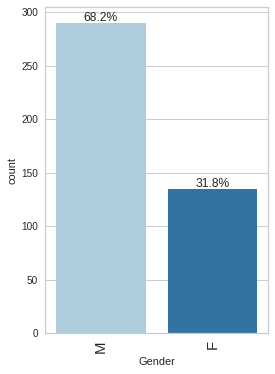

In [86]:
labeled_barplot(data, 'Gender', perc=True)

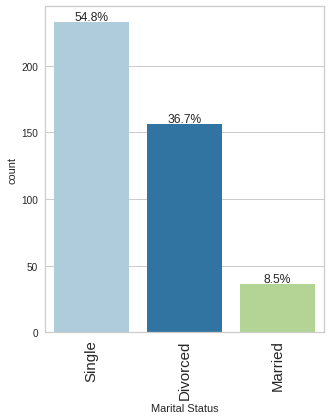

In [87]:
labeled_barplot(data, 'Marital Status', perc=True)

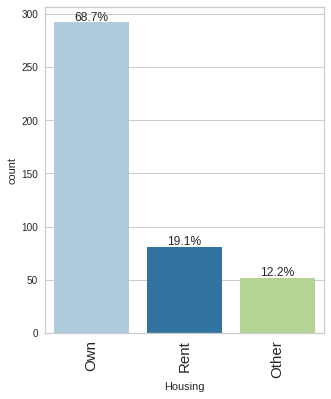

In [88]:
labeled_barplot(data, 'Housing', perc=True)

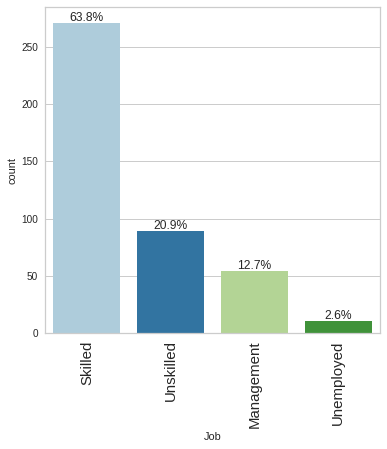

In [89]:
labeled_barplot(data, 'Job', perc=True)

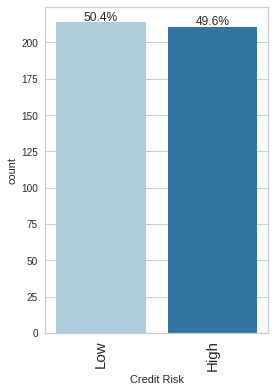

In [90]:
labeled_barplot(data, 'Credit Risk', perc=True)

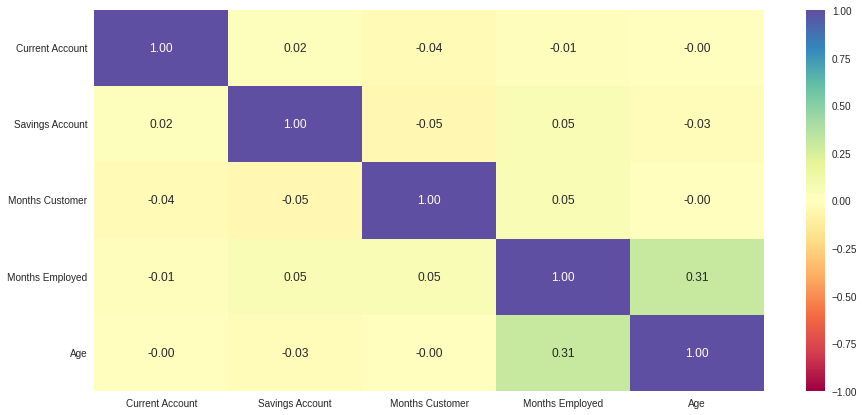

In [91]:
num_col = ['Current Account', 'Savings Account', 'Months Customer', 'Months Employed', 'Age'] 
plt.figure(figsize=(15, 7))
sns.heatmap(data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

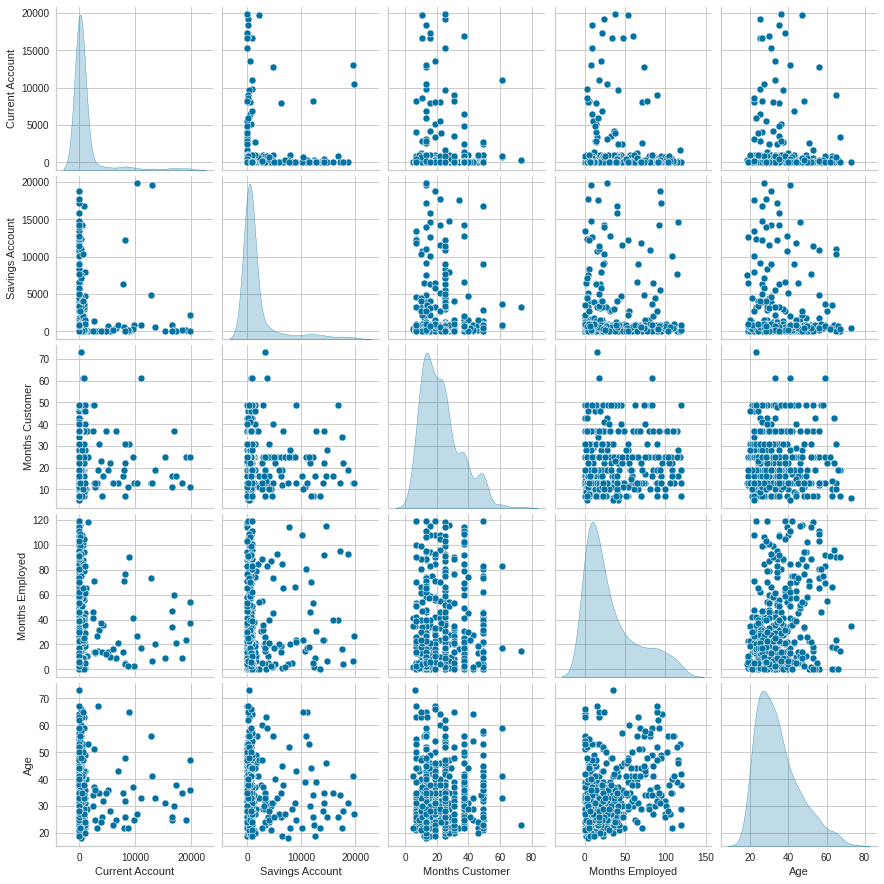

In [92]:
sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

In [93]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

### K-Means

Number of Clusters: 1 	Average Distortion: 1.976031296695904
Number of Clusters: 2 	Average Distortion: 1.729289562235731
Number of Clusters: 3 	Average Distortion: 1.5989969298495028
Number of Clusters: 4 	Average Distortion: 1.4632636095276743
Number of Clusters: 5 	Average Distortion: 1.3005472600250587
Number of Clusters: 6 	Average Distortion: 1.1939115391835067
Number of Clusters: 7 	Average Distortion: 1.1418527018659321
Number of Clusters: 8 	Average Distortion: 1.0932846860555976


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

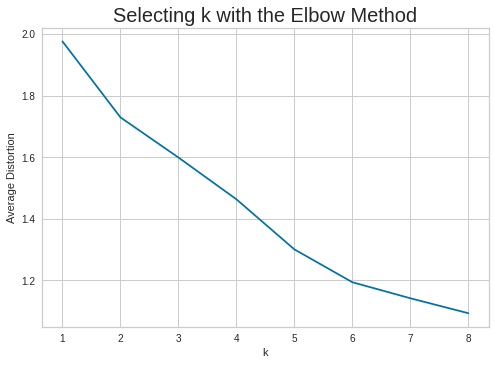

In [94]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

The appropriate k-vvalue seems to be 4 or 5

For n_clusters = 2, silhouette score is 0.27569926361333486
For n_clusters = 3, silhouette score is 0.31538952801324177
For n_clusters = 4, silhouette score is 0.33516769622865356
For n_clusters = 5, silhouette score is 0.30933040816225643
For n_clusters = 6, silhouette score is 0.3096949253348117
For n_clusters = 7, silhouette score is 0.30433130114958085
For n_clusters = 8, silhouette score is 0.31690715319014984
For n_clusters = 9, silhouette score is 0.3075520257089956


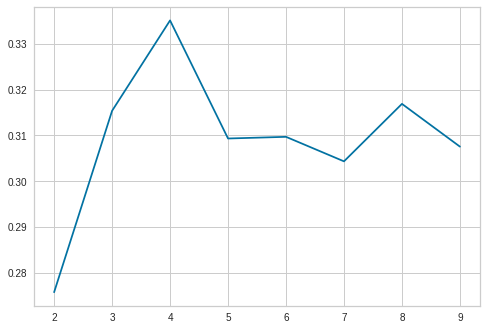

In [95]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

from the silhouette scores, it seems that 4 is the best value of K.

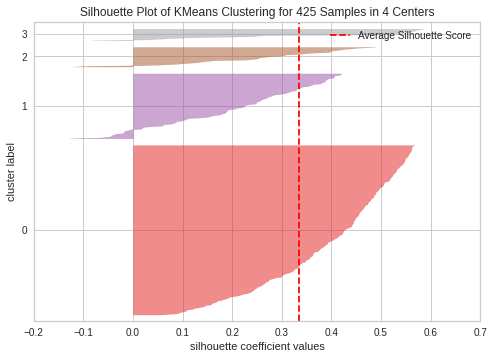

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 425 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [96]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

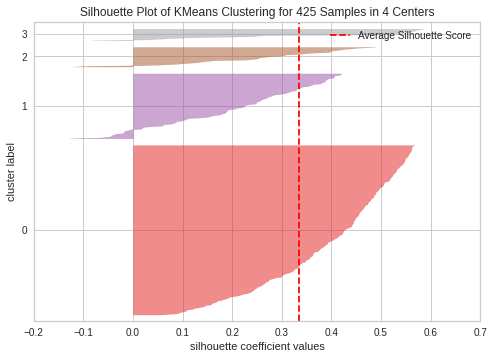

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 425 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [97]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

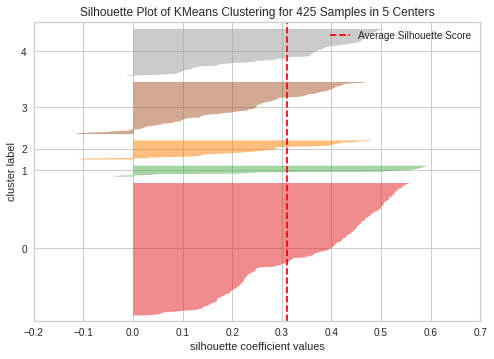

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 425 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [98]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

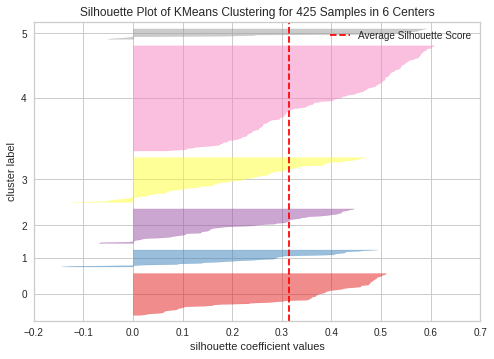

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 425 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [99]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

so 4 is the best K

In [100]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [101]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

In [102]:
cluster_profile = data.groupby("K_means_segments").mean()

In [103]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Age"].count().values
)

In [104]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Account,Savings Account,Months Customer,Months Employed,Age,count_in_each_segment
K_means_segments,,,,,,
0,427.525926,890.888889,23.237037,15.222222,30.651852,270
1,13860.111111,1025.666667,21.000000,30.055556,32.666667,18
2,431.752381,854.514286,23.009524,73.380952,44.361905,105
3,1098.687500,13175.406250,20.718750,37.500000,34.281250,32


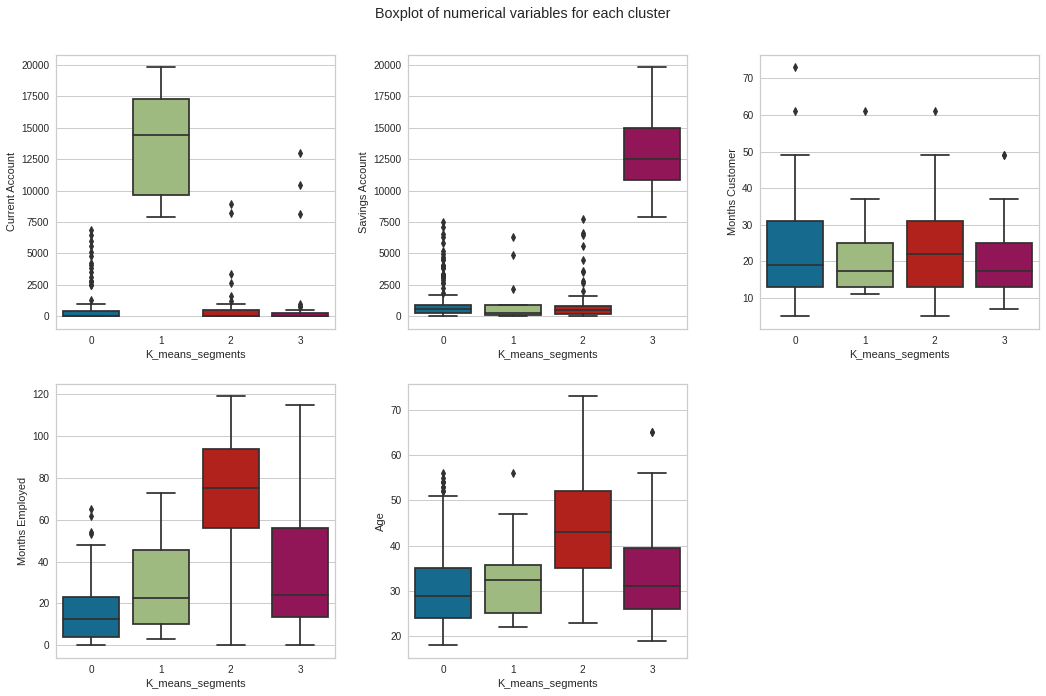

In [105]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=data, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='K_means_segments'>

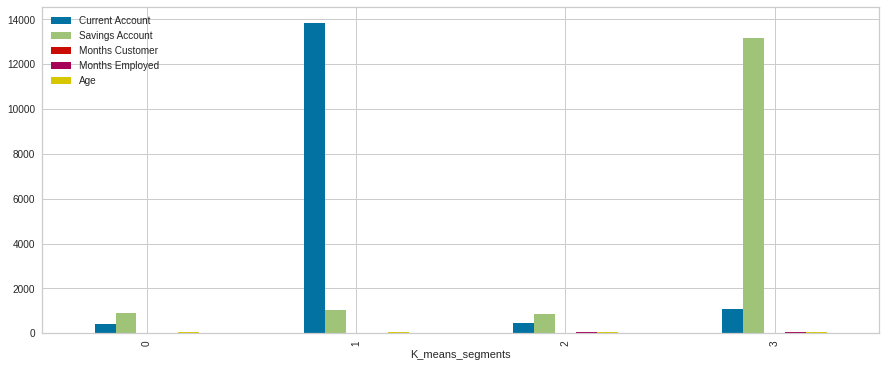

In [106]:
data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

### Hierarchical Clustering

In [107]:
df1 = data.copy()

In [108]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7707277225224081.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7245320003274146.
Cophenetic correlation for Euclidean distance and average linkage is 0.8275947714134047.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7962948986687861.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7609095969693388.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7241874945771252.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8319055185745458.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7409193077162076.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7604273643241518.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5515152949331078.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8197559275188928.
Cophenetic co

In [109]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8319055185745458, which is obtained with Chebyshev distance and average linkage.


As chebyshev has high performance so observing only using chebyshev

In [110]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="chebyshev", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "chebyshev"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7609095969693388.
Cophenetic correlation for complete linkage is 0.7241874945771252.
Cophenetic correlation for average linkage is 0.8319055185745458.
Cophenetic correlation for weighted linkage is 0.7409193077162076.


In [111]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8319055185745458, which is obtained with average linkage.


We see that the cophenetic correlation is maximum with Chebyshev distance and Average linkage.

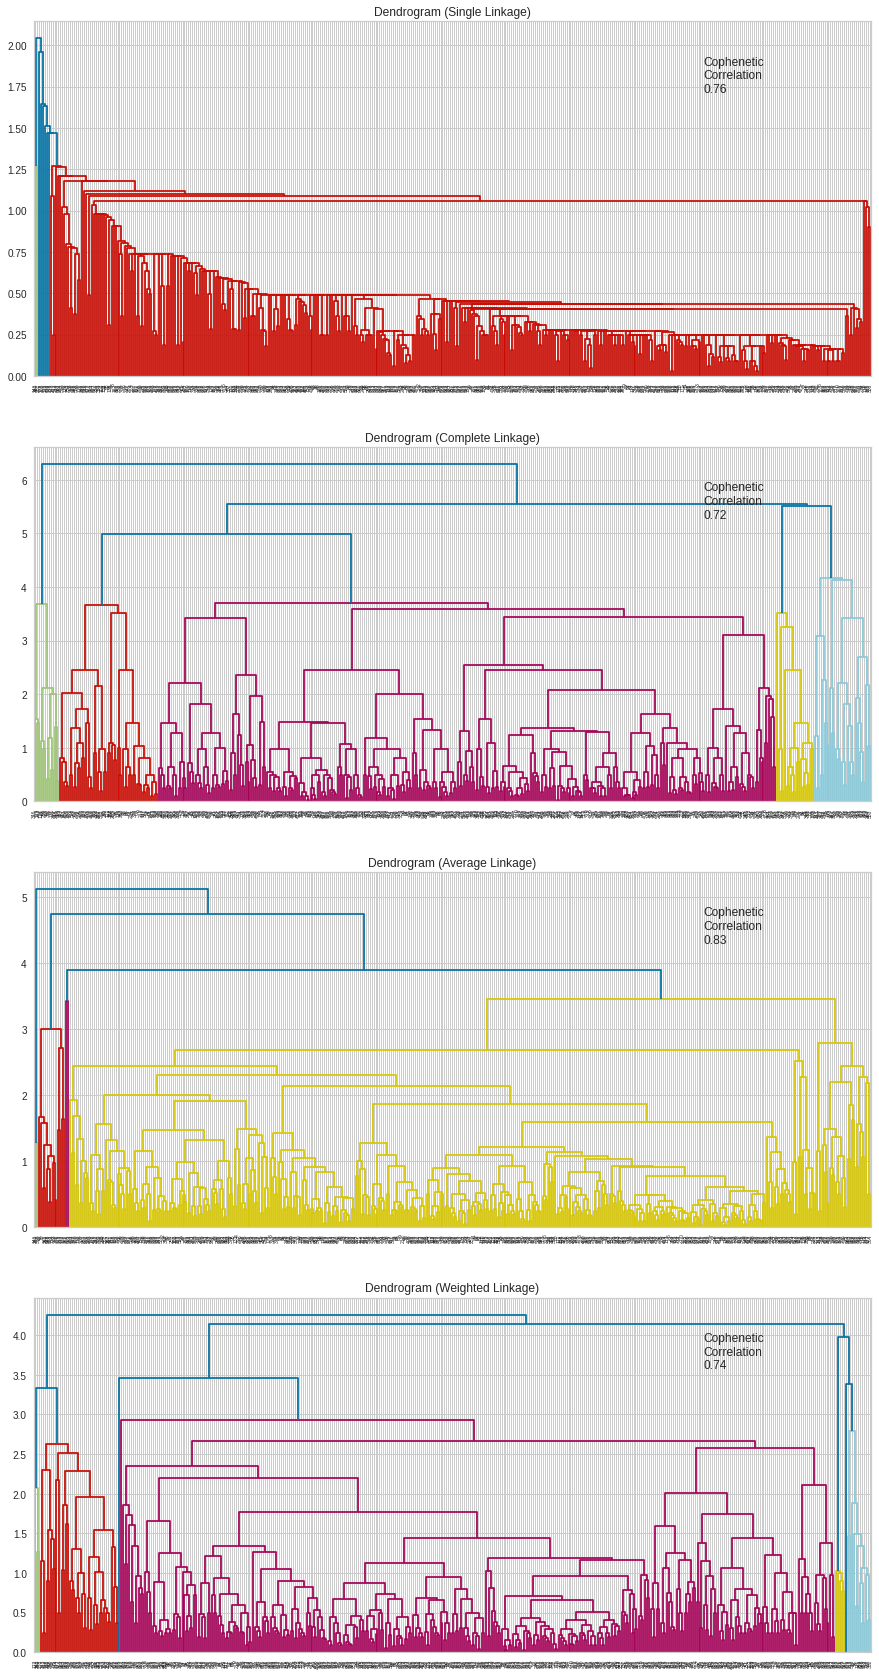

In [112]:
# list of linkage methods
linkage_methods = ["single", "complete", "average",  "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="chebyshev", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [113]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="chebyshev", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='chebyshev', linkage='average', n_clusters=6)

In [114]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

In [115]:
cluster_profile = data.groupby("HC_Clusters").mean()

In [116]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Age"].count().values
)

In [117]:
# let's see the names of the credit risk in each cluster
for cl in data["HC_Clusters"].unique():
    print("In cluster {}, the following credit risk are present:".format(cl))
    print(data[data["HC_Clusters"] == cl]["Credit Risk"].unique())
    print()

In cluster 4, the following credit risk are present:
['Low' 'High']

In cluster 1, the following credit risk are present:
['High' 'Low']

In cluster 0, the following credit risk are present:
['Low' 'High']

In cluster 3, the following credit risk are present:
['Low' 'High']

In cluster 5, the following credit risk are present:
['Low']

In cluster 2, the following credit risk are present:
['High']



In [118]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Account,Savings Account,Months Customer,Months Employed,Age,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,15093.714286,1982.928571,18.928571,35.500000,36.285714,1.214286,14
1,94.000000,12815.928571,21.714286,46.821429,36.571429,2.928571,28
2,298.000000,3326.000000,73.000000,15.000000,23.000000,0.000000,1
3,11695.500000,19689.500000,13.000000,17.000000,34.000000,3.000000,2
4,519.000000,897.456464,22.949868,30.823219,34.203166,0.575198,379
5,11072.000000,891.000000,61.000000,17.000000,33.000000,1.000000,1


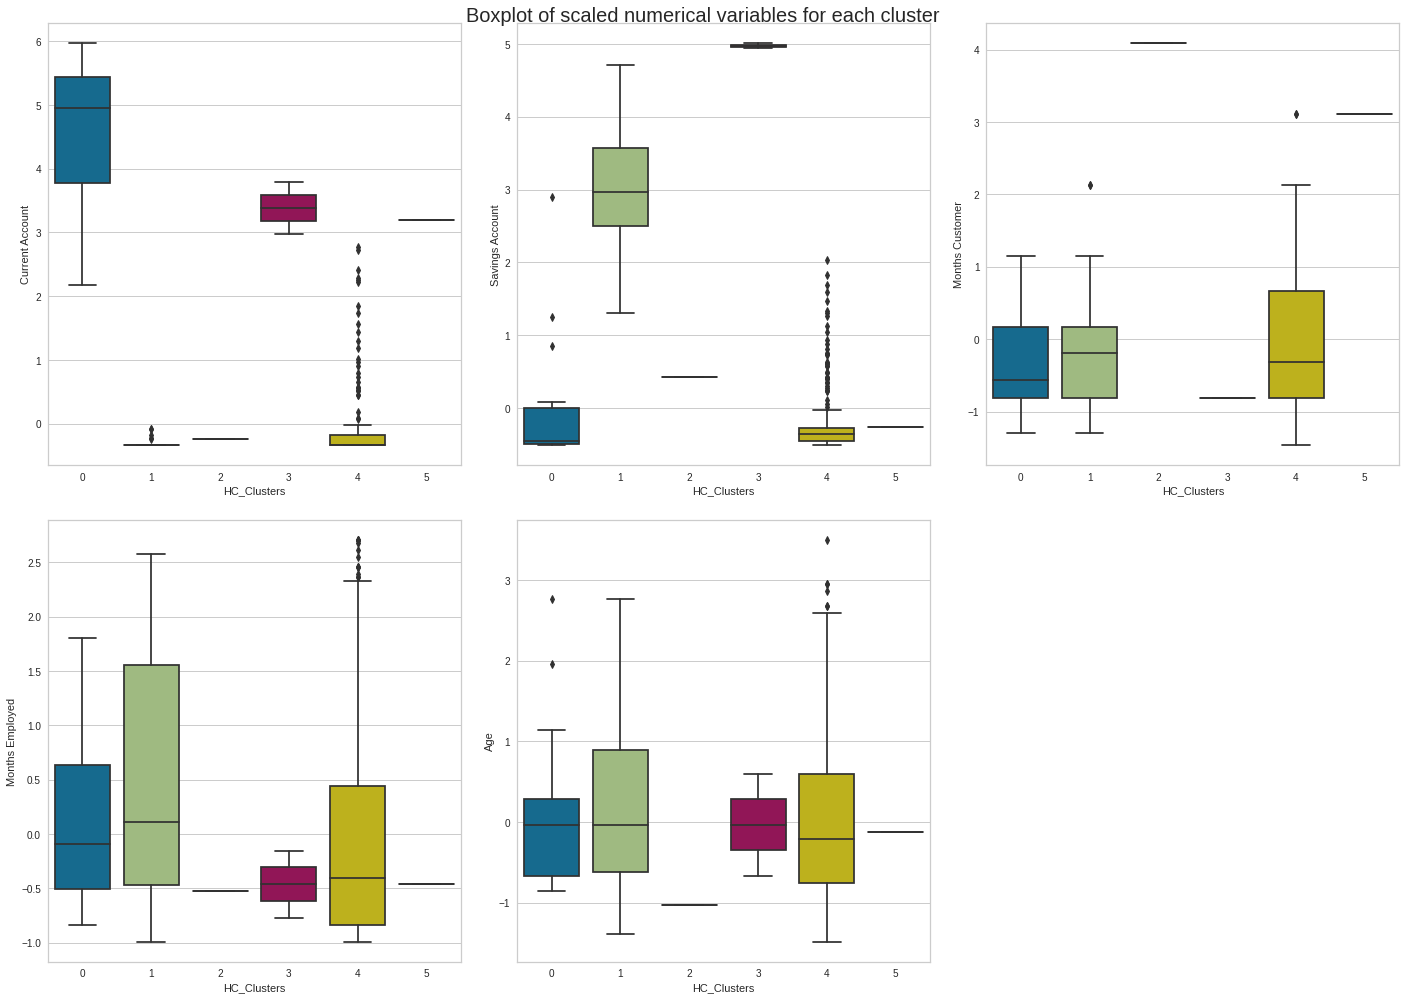

In [119]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

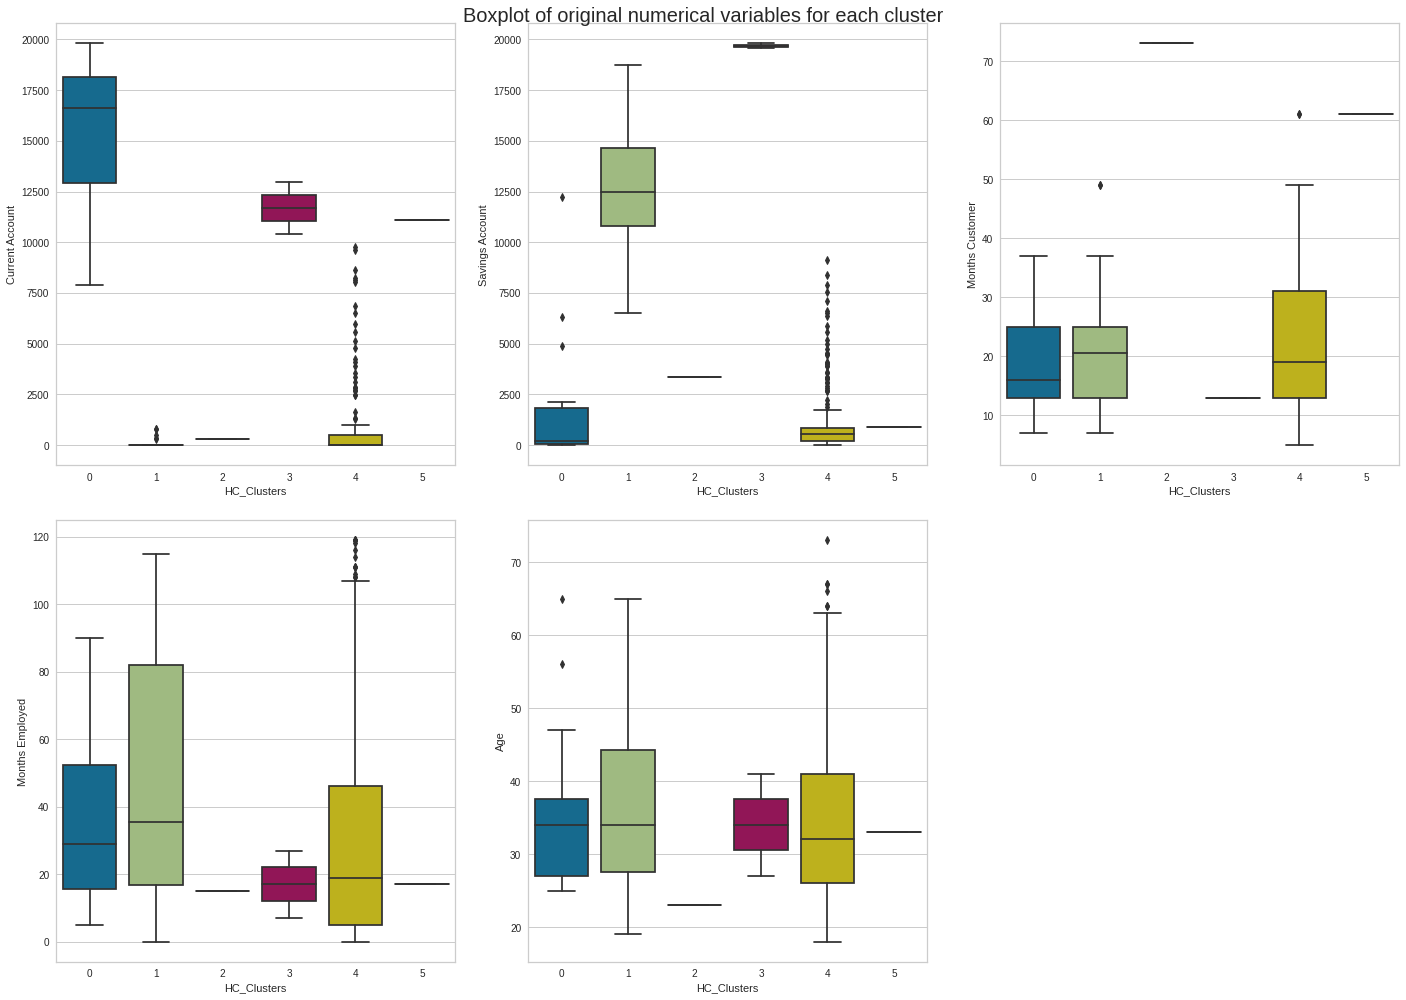

In [120]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=data, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### PCA

In [121]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [122]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.528395344745966

The first 2 principal components explain 52% of data

<Axes: xlabel='Component 1', ylabel='Component 2'>

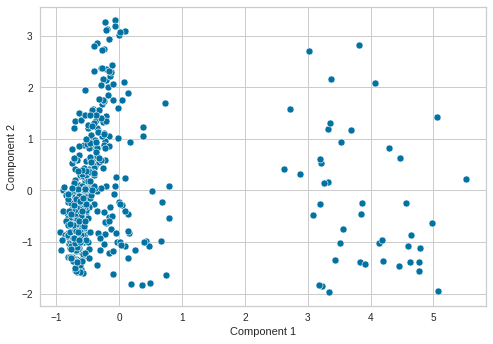

In [123]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

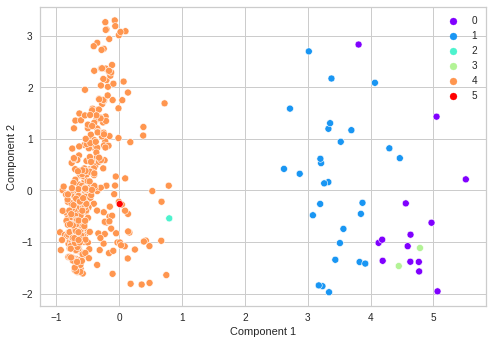

In [125]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

### Insights and Conclusion

We are using a market data to understand the clustering profiles that can be done using clustering analysis. 
- Firstly, we have loaded the data given in an excel file
- There are about 425 rows and 10 columns in the data
- There are no null values present in the data so missing value treatment would not be required
- We can observe that the mean current account values raise about 1000 and mean savings account stay around 1800 which shows money in savings account are usually more than current account and most of the people using banks are middle aged people with mean age of 34.

EDA

- We can observe from barplots that the number of male customers are twice as more as female customers
- And most of the customers are single which also shows that most males can be bachelors
- Most of the people are also skilled which means they are all employees maybe software or government officials
- There is a equal distribution between high and low credit risk
- From the correlation heatmap, we can observe that most of the columns are not correlated but there is a sligh correlation between months employed and age which needs to be taken into consideration
- Also from the pairplot it can be observed that the values of most columns are right skewed so standardization or normalization can be applied

K-means

- while fitting the data on the K-Means algorithm, we can observe that the appropriate values of K seems to be 4 or 5.
- We will try to confirm the k-value using the silhouett score and we observe that k=4 is the best value
- We have also visualized the values using silhouettevisualizer and we have also performed cluster profiling for each cluster and observed the numerical variables for each  cluster and observed that the segment corresponding to months cluster seemed the best.

Hierarchical Clustering

- We built the hierarchical clustering using the 4 different distance metrics - "euclidean", "chebyshev", "mahalanobis", "cityblock" and 4 linkages - "single", "complete", "average", "weighted" and we found the Highest cophenetic correlation as 0.8319055185745458 which is obtained with Chebyshev distance and average linkage
- We also visualized dendograms and also obtained clustering profiles for the same
- Further we also tried PCA for dimensionality reduction to reduce the dimensions to two components and observe them and we have clearly observed the three components differently.